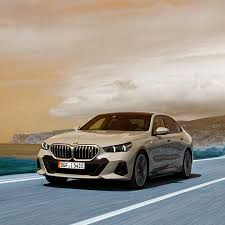

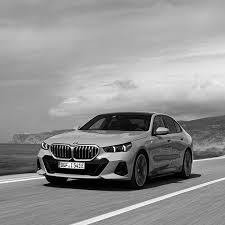

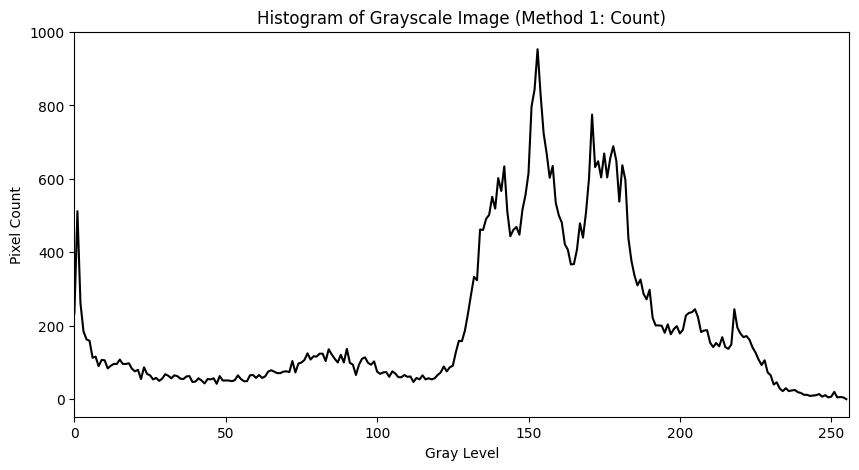

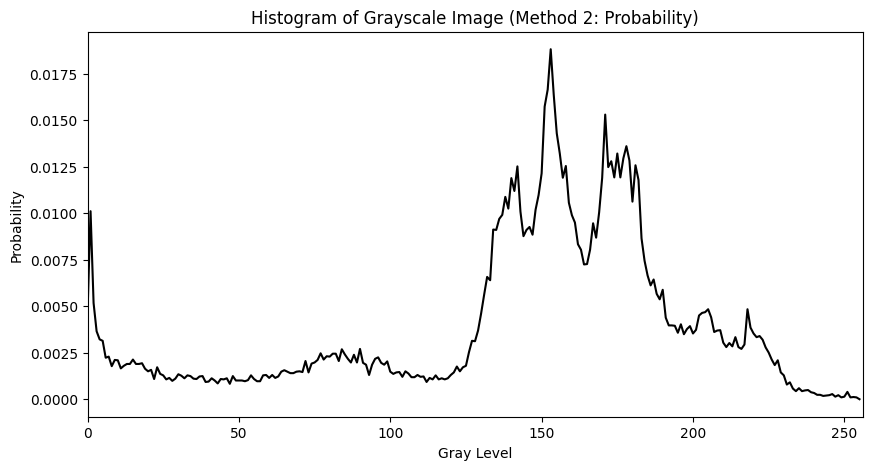

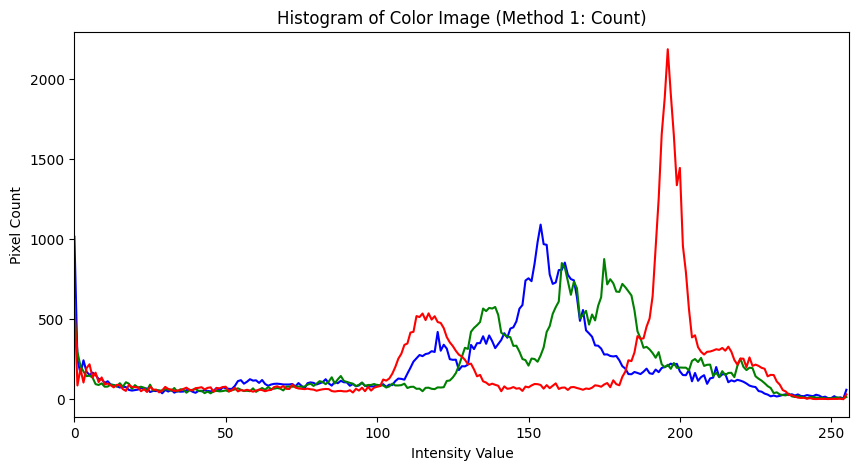

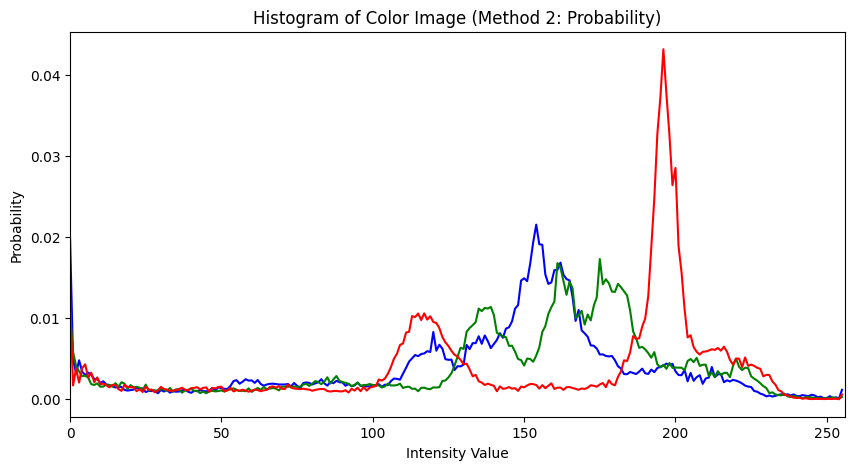

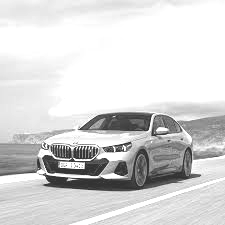

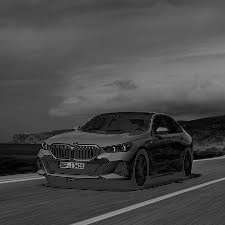

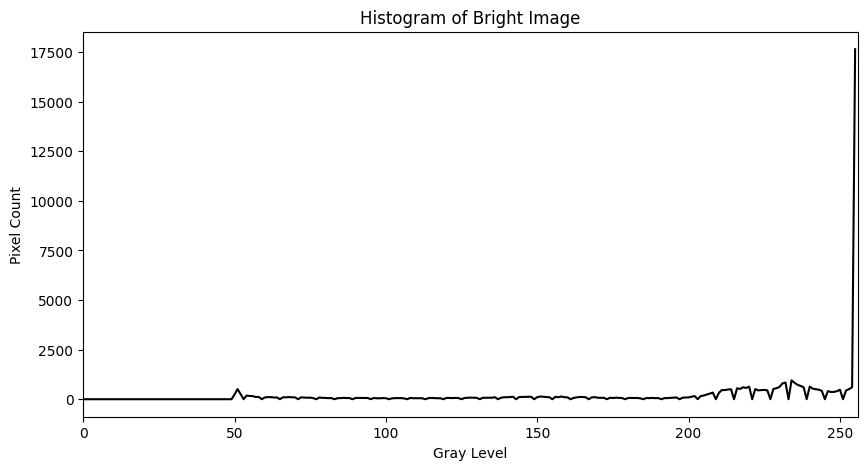

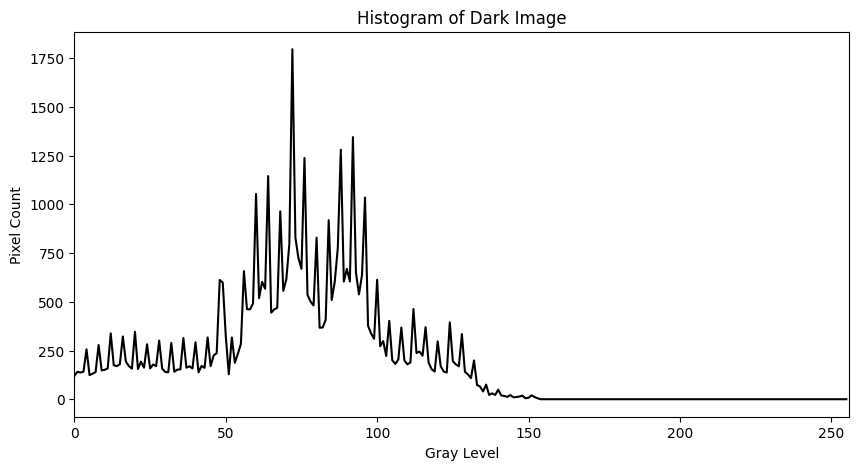

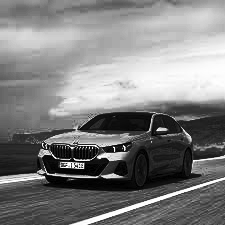

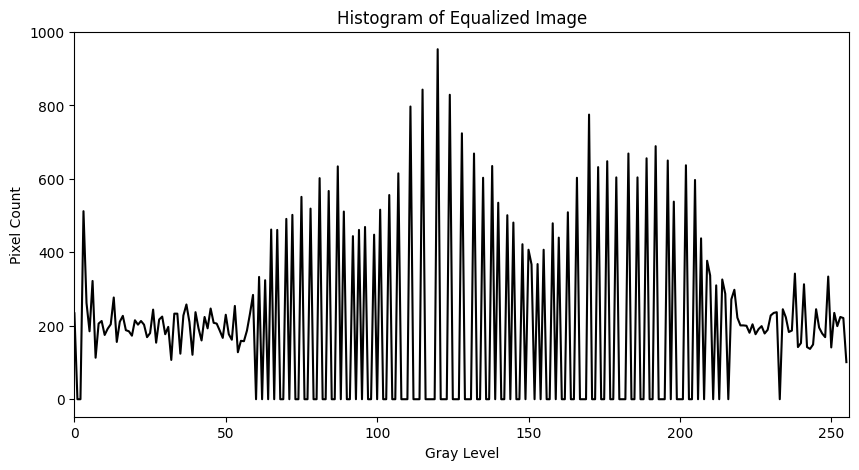

In [ ]:
#E22CSEU0164 PRATHAM PAHWA



import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
def plot_histogram(image, title, method='count'):
    plt.figure(figsize=(10, 5))

    if len(image.shape) == 2:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])

        if method == 'probability':
            hist /= hist.sum()

        plt.plot(hist, color='black')
        plt.title(title)
        plt.xlabel("Gray Level")
        plt.ylabel("Pixel Count" if method == 'count' else "Probability")
        plt.xlim([0, 256])

    else:
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])

            if method == 'probability':
                hist /= hist.sum()

            plt.plot(hist, color=col)

        plt.title(title)
        plt.xlabel("Intensity Value")
        plt.ylabel("Pixel Count" if method == 'count' else "Probability")
        plt.xlim([0, 256])

    plt.show()
image_color = cv2.imread("/content/download.jpeg")
image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
cv2_imshow(image_color)
cv2_imshow(image_gray)
plot_histogram(image_gray, "Histogram of Grayscale Image (Method 1: Count)", method='count')
plot_histogram(image_gray, "Histogram of Grayscale Image (Method 2: Probability)", method='probability')
plot_histogram(image_color, "Histogram of Color Image (Method 1: Count)", method='count')
plot_histogram(image_color, "Histogram of Color Image (Method 2: Probability)", method='probability')
bright_image = cv2.convertScaleAbs(image_gray, alpha=1.2, beta=50)
dark_image = cv2.convertScaleAbs(image_gray, alpha=0.8, beta=-50)

cv2_imshow(bright_image)
cv2_imshow(dark_image)
plot_histogram(bright_image, "Histogram of Bright Image", method='count')
plot_histogram(dark_image, "Histogram of Dark Image", method='count')
equalized_image = cv2.equalizeHist(image_gray)

cv2_imshow(equalized_image)
plot_histogram(equalized_image, "Histogram of Equalized Image", method='count')


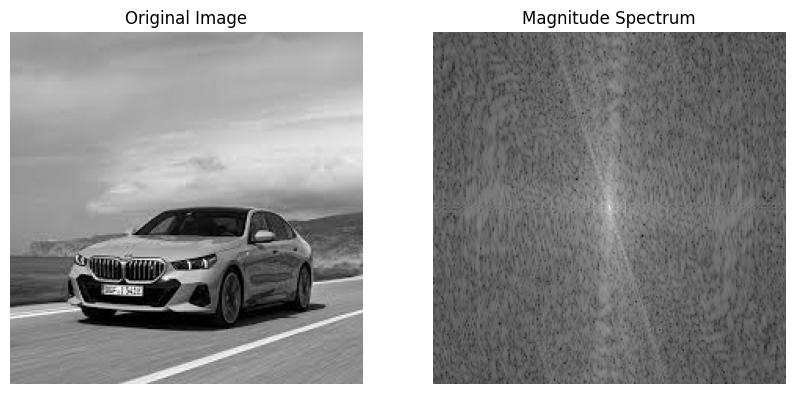

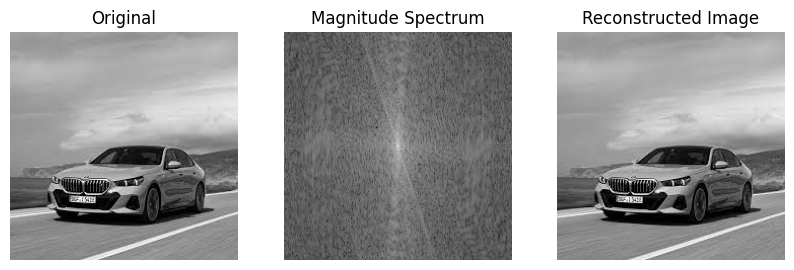

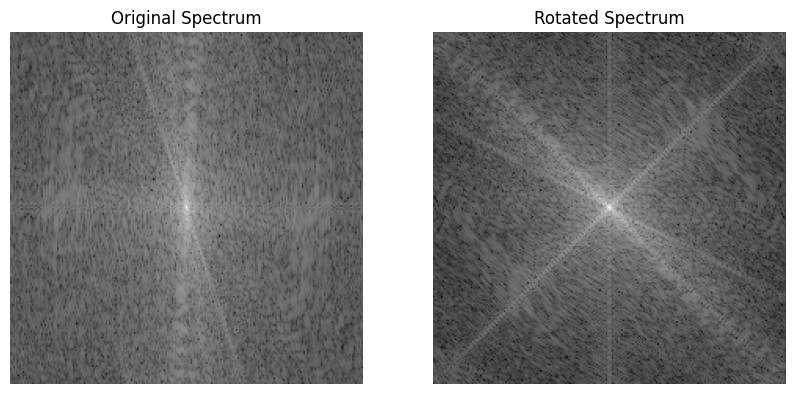

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('/content/download.jpeg', cv2.IMREAD_GRAYSCALE)

def compute_fft(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    return fshift, magnitude_spectrum

#(IFFT)
def compute_ifft(fshift):
    f_ishift = np.fft.ifftshift(fshift)
    img_reconstructed = np.fft.ifft2(f_ishift)
    img_reconstructed = np.abs(img_reconstructed)
    return img_reconstructed

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def display_images(images, titles, cmap='gray'):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

#magnitude spectrum
fshift, magnitude_spectrum = compute_fft(image)
display_images([image, magnitude_spectrum], ["Original Image", "Magnitude Spectrum"])

#reconstructed image
img_reconstructed = compute_ifft(fshift)
display_images([image, magnitude_spectrum, img_reconstructed], ["Original", "Magnitude Spectrum", "Reconstructed Image"])

rotated_image = rotate_image(image, 45)

fshift_rot, magnitude_spectrum_rot = compute_fft(rotated_image)

display_images([magnitude_spectrum, magnitude_spectrum_rot], ["Original Spectrum", "Rotated Spectrum"])